# House Loan Prediction

In this Project I will be creating different supervised learning algorithms such as Logistic Regression, SVM,Decision Tree,K Nearest Neighbors,Random Forest and XGBoost to predict Housing loan approvals based on factors such as credit score, # of dependents and education etc.

The dataset for this Project can be found [here](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data)

Import Required Libaries:

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Data Cleaning:

In [72]:
df = pd.read_csv('~/Documents/loan_approval_dataset.csv')
df = df.dropna()
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [74]:
#dropping the 'loan_id' column as it is not needed for our ML model
df.drop(columns=['loan_id'], inplace=True)


In [75]:
# removing spaces ahead of column names
df.rename(columns=lambda x: x.strip(),inplace=True)
print(df.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


In [76]:
label_encoder = LabelEncoder()
#creating a LabelEncoder for columns loan_status, self_employed, education
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
df['education'] = label_encoder.fit_transform(df['education'])
df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
print(df[['education','loan_status','self_employed']])


      education  loan_status  self_employed
0             0            0              0
1             1            1              1
2             0            1              0
3             0            1              0
4             1            1              1
...         ...          ...            ...
4264          0            1              1
4265          1            0              1
4266          1            1              0
4267          1            0              0
4268          0            0              0

[4269 rows x 3 columns]


In [77]:
df.dtypes
# all columns should be int datatype

no_of_dependents            int64
education                   int64
self_employed               int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int64
dtype: object

In [78]:
#created a StandardScaler for all columns except loan_status, as this is our target Variable
scaler = StandardScaler()

x = df.drop(columns=['loan_status'])
y = df['loan_status']

numerical_columns = ['no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']
x[numerical_columns] = scaler.fit_transform(x[numerical_columns])
print("Scaled Variables")
print(x.head())
print("Target Variables")
print(y.head())

Scaled Variables
   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0         -0.294102  -0.995559      -1.007288      1.617979     1.633052   
1         -1.473548   1.004461       0.992765     -0.341750    -0.324414   
2          0.295621  -0.995559      -1.007288      1.439822     1.610933   
3          0.295621  -0.995559      -1.007288      1.119139     1.721525   
4          1.475067   1.004461       0.992765      1.689242     1.002681   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0   0.192617     1.032792                 -0.780058                 2.877289   
1  -0.508091    -1.061051                 -0.733924                -0.631921   
2   1.594031    -0.544840                 -0.057300                -0.107818   
3  -0.508091    -0.771045                  1.649637                -0.381263   
4   1.594031    -1.264055                  0.757724                 0.735304   

   luxury_assets_value  bank_asset_value  
0 

In [79]:
#create train and test variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=50)


# LogisticRegression

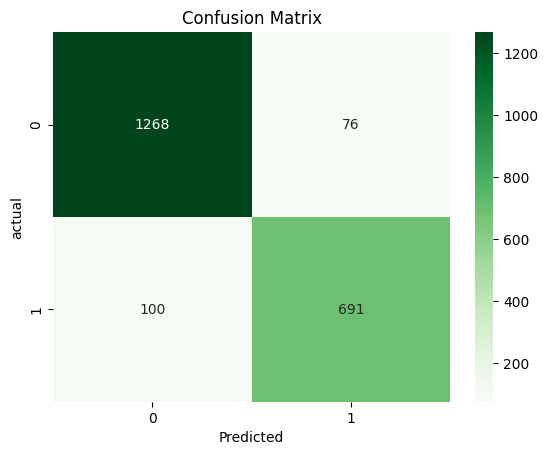

Accuracy 0.9175644028103045
Precision 0.9172722667377614
Recall 0.9175644028103045
F1 Score 0.9172942280935785
Classification Report               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1344
           1       0.90      0.87      0.89       791

    accuracy                           0.92      2135
   macro avg       0.91      0.91      0.91      2135
weighted avg       0.92      0.92      0.92      2135



In [80]:

logistic_reg = LogisticRegression(random_state=50)

logistic_reg.fit(x_train, y_train)

y_pred1 = logistic_reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred1)

precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test,y_pred1, average='weighted')
f1 = f1_score(y_test,y_pred1, average='weighted')

classification_rep = classification_report(y_test,y_pred1)
conf_matrix = confusion_matrix(y_test,y_pred1)

sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1)


print("Classification Report", classification_rep)


# RandomForest

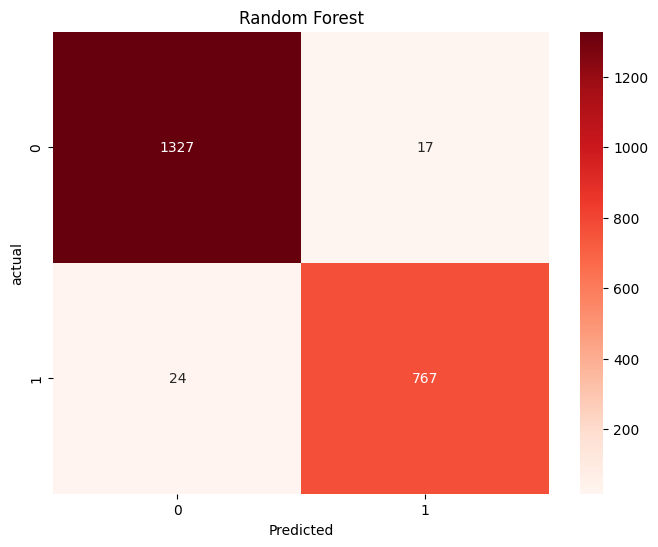

Accuracy 0.9812646370023419
Precision 0.9813028898497527
Recall 0.9812646370023419
F1 Score 0.9812243564037277
Classification Report               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1344
           1       0.98      0.96      0.97       791

    accuracy                           0.98      2135
   macro avg       0.98      0.98      0.98      2135
weighted avg       0.98      0.98      0.98      2135



In [81]:
random_forest = RandomForestClassifier(random_state=50)

random_forest.fit(x_train,y_train)

RF_y_pred = random_forest.predict(x_test)
RF_accuracy = accuracy_score(y_test, RF_y_pred)
RF_precision = precision_score(y_test, RF_y_pred, average='weighted')
RF_recall = recall_score(y_test, RF_y_pred, average='weighted')
RF_f1 = f1_score(y_test, RF_y_pred, average='weighted')

RF_classification_rep = classification_report(y_test, RF_y_pred)

RF_conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(RF_conf_matrix, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted')
plt.ylabel('actual')
plt.title('Random Forest')
plt.show()

print("Accuracy", RF_accuracy)
print("Precision", RF_precision)
print("Recall", RF_recall)
print("F1 Score", RF_f1)


print("Classification Report", RF_classification_rep)



# Decision Tree

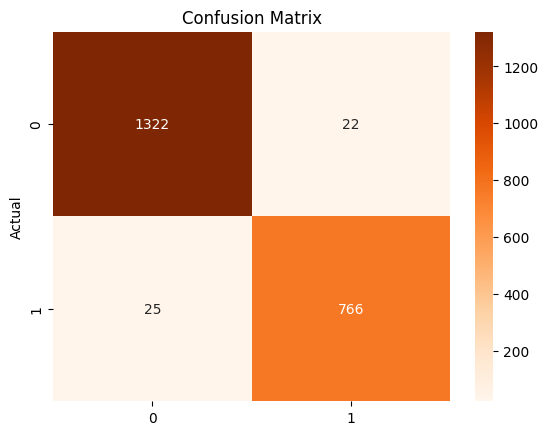

Decision Tree Classifier Metrics:
Accuracy: 0.9779859484777518
Precision: 0.9779727976309731
Recall: 0.9779859484777518
F1 Score: 0.9779773067576232
Classification Report               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1344
           1       0.97      0.97      0.97       791

    accuracy                           0.98      2135
   macro avg       0.98      0.98      0.98      2135
weighted avg       0.98      0.98      0.98      2135



In [86]:
decision_tree = DecisionTreeClassifier(random_state=50)

decision_tree.fit(x_train,y_train)

DT_y_pred = decision_tree.predict(x_test)

DT_accuracy = accuracy_score(y_test, DT_y_pred)

DT_precision = precision_score(y_test, DT_y_pred, average='weighted')
DT_recall = recall_score(y_test, DT_y_pred, average='weighted')
DT_f1 = f1_score(y_test, DT_y_pred, average='weighted')

DT_classification_rep = classification_report(y_test, DT_y_pred)

DT_conf_matrix = confusion_matrix(y_test, DT_y_pred)


sns.heatmap(DT_conf_matrix, annot=True, fmt='d',cmap='Oranges')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Decision Tree Classifier Metrics:")
print("Accuracy:", DT_accuracy)
print("Precision:", DT_precision)
print("Recall:", DT_recall)
print("F1 Score:", DT_f1)


print("Classification Report", DT_classification_rep)




# SVM

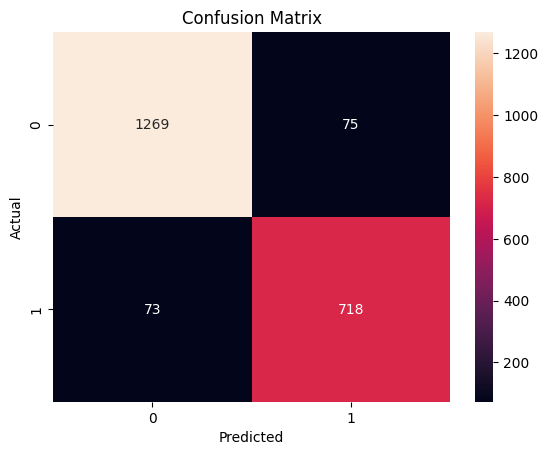

SVM Classifier Metrics:
Accuracy: 0.9306791569086651
Precision: 0.9307167973117986
Recall: 0.9306791569086651
F1 Score: 0.9306971118605214
Classification Report               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1344
           1       0.91      0.91      0.91       791

    accuracy                           0.93      2135
   macro avg       0.93      0.93      0.93      2135
weighted avg       0.93      0.93      0.93      2135



In [83]:
from sklearn.svm import SVC 

svm_classifier = SVC(random_state=50)

svm_classifier.fit(x_train,y_train)

svm_y_pred = svm_classifier.predict(x_test)

svm_accuracy = accuracy_score(y_test,svm_y_pred)

svm_precision = precision_score(y_test, svm_y_pred, average='weighted')
svm_recall = recall_score(y_test, svm_y_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_y_pred, average='weighted')

svm_classification_rep = classification_report(y_test, svm_y_pred)

svm_conf_matrix = confusion_matrix(y_test,svm_y_pred)


sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='rocket')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("SVM Classifier Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)

print("Classification Report", svm_classification_rep)


# KNeighbors

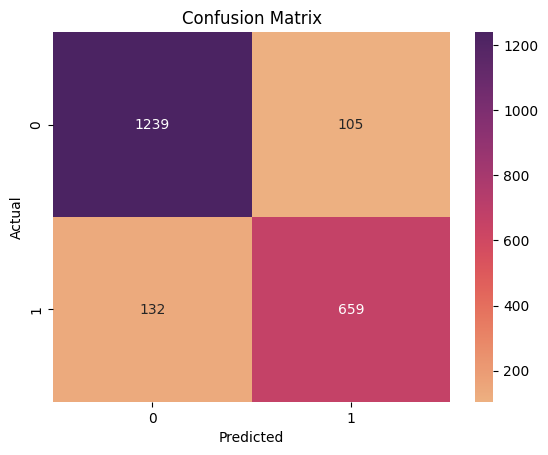

K-Nearest Neighbors Classifier Metrics:
Accuracy: 0.8889929742388759
Precision: 0.8884725196154311
Recall: 0.8889929742388759
F1 Score: 0.888581216285048
Classification Report               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1344
           1       0.86      0.83      0.85       791

    accuracy                           0.89      2135
   macro avg       0.88      0.88      0.88      2135
weighted avg       0.89      0.89      0.89      2135



In [84]:
knn_clasifier = KNeighborsClassifier(n_neighbors =5)

knn_clasifier.fit(x_train,y_train)

knn_y_pred = knn_clasifier.predict(x_test)

knn_accuracy = accuracy_score(y_test,knn_y_pred)

knn_precision = precision_score(y_test,knn_y_pred, average="weighted")
knn_recall = recall_score(y_test,knn_y_pred, average="weighted")
knn_f1 = f1_score(y_test,knn_y_pred, average="weighted")

knn_classification_rep = classification_report(y_test,knn_y_pred)

knn_conn_matrix = confusion_matrix(y_test,knn_y_pred)


sns.heatmap(knn_conn_matrix, annot=True, fmt='d', cmap='flare')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("K-Nearest Neighbors Classifier Metrics:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)


print("Classification Report", knn_classification_rep)

# XGBoost

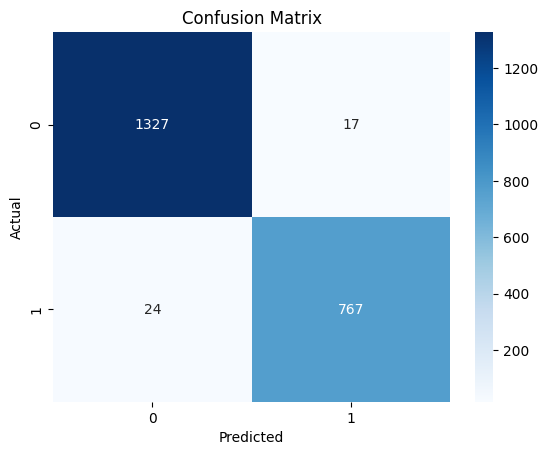

XGBoost Classifier Metrics:
Accuracy: 0.9807962529274005
Precision: 0.9807834035678318
Recall: 0.9807962529274005
F1 Score: 0.980778517865169
Classification Report               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1344
           1       0.98      0.97      0.97       791

    accuracy                           0.98      2135
   macro avg       0.98      0.98      0.98      2135
weighted avg       0.98      0.98      0.98      2135



In [85]:
xgb_classifier = XGBClassifier(random_state=50)

xgb_classifier.fit(x_train,y_train)

y_pred = xgb_classifier.predict(x_test)

xgb_accuracy = accuracy_score(y_test,y_pred)

xgb_precision = precision_score(y_test, y_pred, average="weighted")
xgb_recall = recall_score(y_test,y_pred, average="weighted")
xgb_f1 = f1_score(y_test,y_pred, average="weighted")

xgb_classification_rep = classification_report(y_test,y_pred)

xgb_conn_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(xgb_conn_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("XGBoost Classifier Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)


print("Classification Report", xgb_classification_rep)

# Conclusion:
XGBoost and Random Forest are the best models to use as they scored 98%+ accuracy score.While KNeighbors and Logisitc Regression were the worst models with accuracy scores just over 90%